# Финальное задание курса

В итоговом задании курса мы предлагаем вам решить задачу регрессии - по характеристикам поездок на такси в Нью-Йорке научиться определять их стоимость.

В задании две части:

* первая часть - обычная. Так устроены все ноутбуки с домашними заданиями в курсе. Мы что-то просим - вы делаете. Задания этой части как обычно проверяются тестами на Stepik

* вторая часть - творческая. В этой части мы даем вам лишь идеи того, что можно сделать, а все остальное - на вас. Это задание проверяется в виде текстового отчета (подробности смотрите в описании второй части задания)

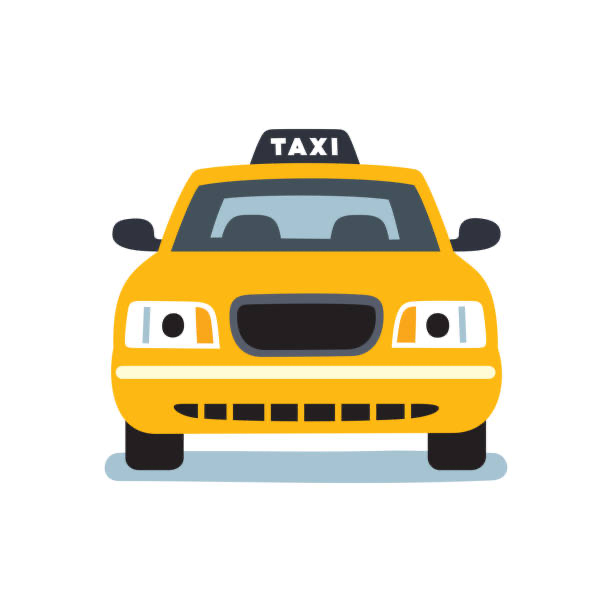

# Часть 1

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Считаем данные

In [13]:
df = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


## Исследование данных

### Quiz

Сколько строк в таблице df?

In [14]:
df.shape[0]

615962

### Quiz

Есть ли пропущенные значения в таблице? В скольких столбцах есть пропуски?

In [15]:
df.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      1
dropoff_longitude    3
dropoff_latitude     3
passenger_count      1
fare_amount          1
dtype: int64

### Quiz

Удалите строки с пропущенными значениями из таблицы. Сколько строк осталось в таблице?

In [16]:
df.dropna(inplace = True)
df.shape[0]

615959

Удалите из данных колонку `key`, так как в ней дублируется информация из `pickup_datetime`

In [17]:
df.drop('key', axis=1, inplace = True)

Обработайте колонку `pickup_datetime`. Выделите из нее 4 новых столбца:

* `year` - год поездки
* `month` - месяц поездки
* `day` - день поездки
* `hour` - час поездки. Час вычисляйте так: если до следующего часа осталось меньше 30 минут (на секунды не смотрим), что час округляете до следующего.

Пример: 14:18:20 -> 14 часов, 17:48:29 -> 18 часов

Затем удалите столбец `pickup_datetime`.



In [18]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [19]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['day'] = df.pickup_datetime.dt.day
df['hour'] = df.pickup_datetime.apply(lambda x: x.hour if x.minute<=30 else x.hour+1)

In [20]:
df.drop('pickup_datetime', axis=1, inplace = True)

## Вопросы по данным

### Quiz

В какие годы совершались поездки?

In [21]:
import seaborn as sns

<Axes: xlabel='year', ylabel='count'>

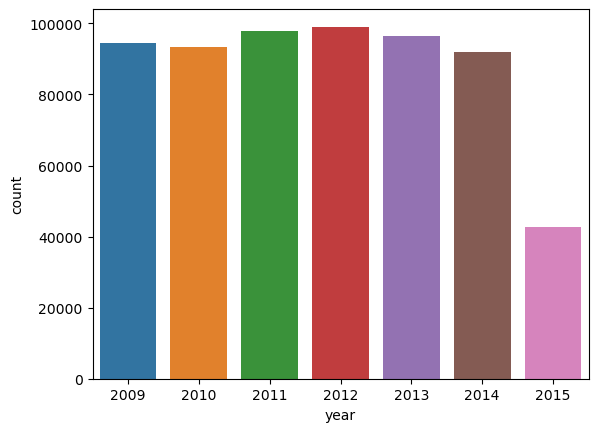

In [22]:
sns.countplot(df, x="year")

### Quiz

В какой час было совершено больше всего поездок?

<Axes: xlabel='hour', ylabel='count'>

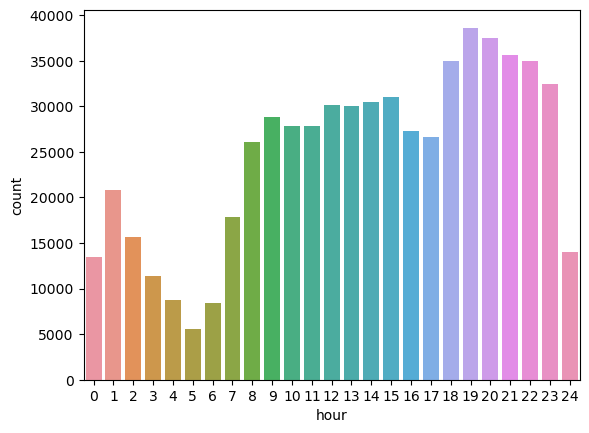

In [23]:
sns.countplot(df, x="hour")

### Quiz

В какой сезон (зима, весна, лето, осень) было совершено наименьшее число поездок?

In [24]:
def sezon (x):
    if x==12 or x==1 or x ==2:
        return 'Зима'
    if x==3 or x==4 or x ==5:
        return 'Весна'
    if x==6 or x==7 or x ==8:
        return 'Лето'
    if x==9 or x==10 or x ==11:
        return 'Осень'

In [25]:
sezon_col = df['month'].apply(sezon).value_counts()

<Axes: title={'center': 'Сезон_количество'}>

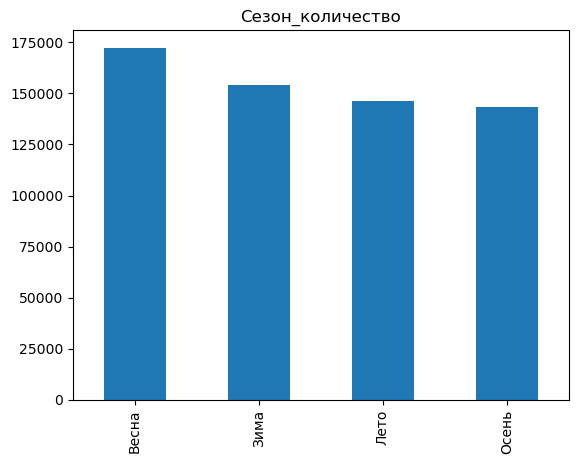

In [26]:
sezon_col.plot(kind="bar", title="Сезон_количество")

Постройте scatter plot в осях `pickup_latitude` и `pickup_longitude`

<Axes: xlabel='pickup_latitude', ylabel='pickup_longitude'>

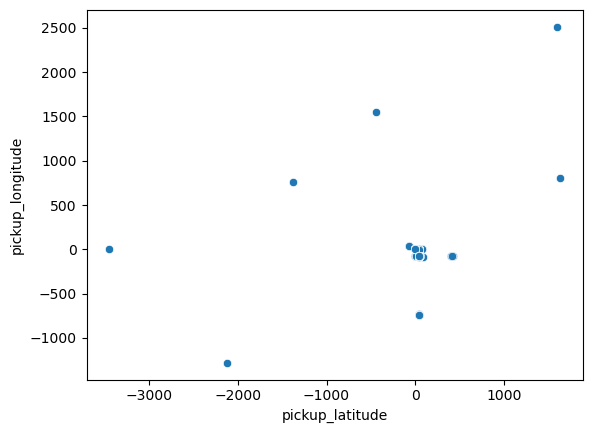

In [27]:
sns.scatterplot(data=df, x="pickup_latitude", y="pickup_longitude")

### Quiz

Постройте ящик с усами boxplot для `pickup_longitude`. Есть ли на визуализации выбросы? (отдельные точки)

<Axes: xlabel='pickup_longitude'>

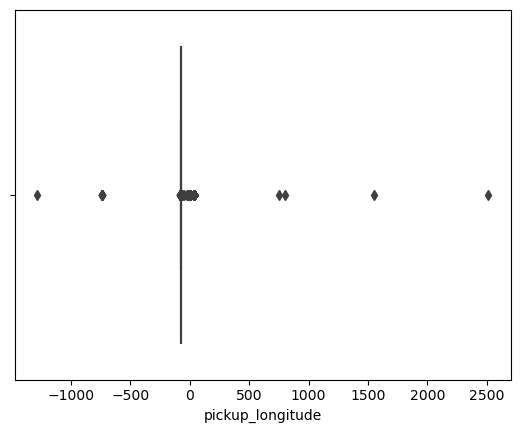

In [28]:
sns.boxplot(x=df["pickup_longitude"])

### Quiz

Чему равна медиана `pickup_longitude`? Ответ округлите до тысячных.

In [29]:
round(df[['pickup_longitude']].median(),3)

pickup_longitude   -73.982
dtype: float64

Постройте гистограмму распределения признака `hour`.

<Axes: xlabel='day', ylabel='Count'>

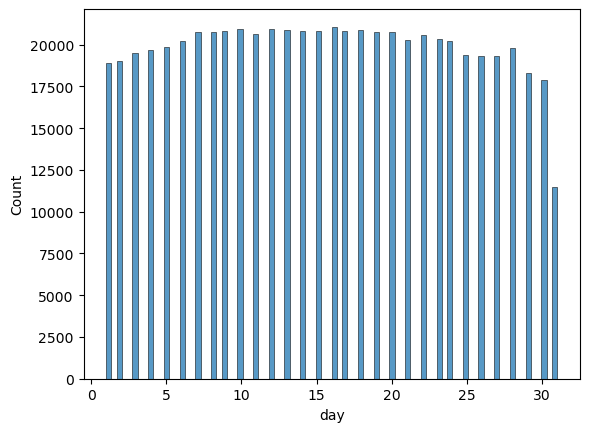

In [30]:
sns.histplot(df.day)

## Построение baseline-модели

Разбейте `df` на матрицу объект-признак `X` и вектор с целевой переменной `y`. Целевая переменная - столбец `fare_amount`.

In [64]:
X = df.drop('fare_amount', axis =1)
y = df['fare_amount']

Разбейте данные на тренировочную и тестовую части с помощью train_test_split.

Тестовая часть - 25% всех данных, `random_state=42`.

Сколько строк в матрице `X_train`?

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 42)

In [67]:
X_train.shape[0]

461969

### Quiz

Обучите решающее дерево глубины 3 на тренировочных данных и вычислите ошибку $R^2$ на тесте. Ответ округлите до сотых.

Зафиксируйте у дерева `random_state=42`.

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model_decision = DecisionTreeRegressor(max_depth=3,random_state = 42)
model_decision.fit(X_train, y_train)
scoreR2 = r2_score(y_test, model_decision.predict(X_test))
print('r2_score: ',round(scoreR2,2))

r2_score:  0.5


### Quiz

Постройте гистограмму важности признаков.

Какой признак имеет наибольший вес?

In [70]:
feature_importances_decision = pd.Series(model_decision.feature_importances_, index = X.columns)

<Axes: title={'center': 'Важность признаков'}>

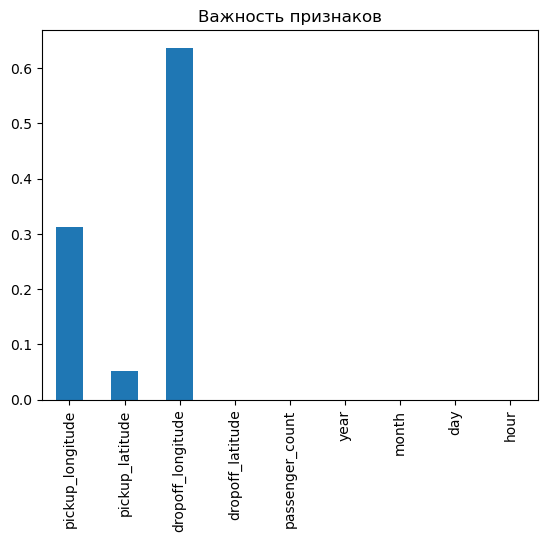

In [71]:
feature_importances_decision.plot(kind="bar", title="Важность признаков")

## Улучшение модели

### Quiz

Постройте гистограмму распределения целевой переменной `y`, укажите параметр `bins=100`.

Является ли распределение нормальным?

<Axes: ylabel='Frequency'>

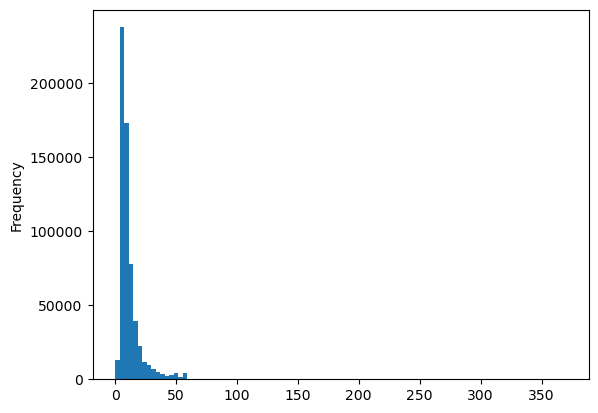

In [72]:
y.plot.hist(bins=100)

Замените все значения $y$, меньшие 0, на 0.

Сделайте преобразование целевой переменной по правилу $y_{new} = np.log1p(y)$

Заново разбейте данные на тренировочную и тестовую часть по тем же правилам, что и раньше, но теперь используйте `X` и `y_new`.

In [94]:
y[y<0]=0
y_new = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X,y_new, test_size =0.25, random_state = 42)

C:\Users\Covid2019\AppData\Local\Temp\ipykernel_8796\2687382104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y<0]=0


### Quiz

Заново обучите решающее дерево глубины 3 с `random_state=42` на тренировочных данных и вычислите $R^2$ на тесте. Ответ округлите до сотых.

Перед вычислением $R^2$ сделайте обратное преобразование от прогноза: `np.expm1(pred)` и от `y_test`.

**Важно:** дальше мы будем работать с преобразованной целевой переменной, поэтому при вычислении $R^2$ во всех заданиях ниже делайте обратное преобразование.

In [95]:
model_decision.fit(X_train, y_train)
scoreR2_new = r2_score(np.expm1(y_test), np.expm1(model_decision.predict(X_test)))
print('r2_score:',round(scoreR2_new,2))

r2_score: 0.44


### Quiz


Подберите по кросс-валидации на тренировочных данных глубину дерева в диапазоне от 3 до 10 включительно с шагом 1 (`random_state=42`).

`cv=3, scoring=r2`

Затем примените модель с оптимальной глубиной на тесте и вычислите $R^2$. Ответ округлите до сотых.

Перед вычислением $R^2$ не забудьте (как и дальше) делать преобразование `np.expm1`

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
for i in range(3,11):
    print('r2_score:',np.mean(cross_val_score(DecisionTreeRegressor(max_depth=i,random_state = 42),X_train, y_train,cv=3, scoring='r2')),
         'max_depth:', i)

r2_score: 0.36462367885639985 max_depth: 3
r2_score: 0.41843642164333433 max_depth: 4
r2_score: 0.458150967692494 max_depth: 5
r2_score: 0.48329347617651114 max_depth: 6
r2_score: 0.5040117812561699 max_depth: 7
r2_score: 0.5283135739495434 max_depth: 8
r2_score: 0.5470431219553539 max_depth: 9
r2_score: 0.5620561878845917 max_depth: 10


In [98]:
model_decision_new = DecisionTreeRegressor(max_depth=10,random_state = 42)
model_decision_new .fit(X_train, y_train)
scoreR = r2_score(np.expm1(y_test), np.expm1(model_decision_new.predict(X_test)))
print('r2_score:',round(scoreR,2))

r2_score: 0.68


## Усложнение пайплайна

Создайте pipeline, в котором сначала извлеките полиномиальные признаки степени 2 из данных, а затем обучите решающее дерево глубины 3 с `random_state=42`.

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

p1 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))
])

### Quiz

Обучите pipeline на тренировочных данных, сделайте прогноз на тесте и вычислите $R^2$. Ответ округлите до сотых.

In [100]:
p1.fit(X_train, y_train)
score_p1 = r2_score(np.expm1(y_test), np.expm1(p1.predict(X_test)))
print('r2_score:',round(score_p1,2))

r2_score: 0.42


При помощи GridSearchCV с теми же гиперпараметрами, что и раньше, подберите глубину дерева внутри пайплайна в диапазоне от 3 до 10 включительно с шагом 1.

In [101]:
from sklearn.model_selection import GridSearchCV 

In [102]:
param = {"model__max_depth":np.arange(3,11)}
grid = GridSearchCV(p1, param,scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('features', PolynomialFeatures()),
                                       ('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             param_grid={'model__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2')

### Quiz

Выведите $R^2$ лучшего результата на тесте. Ответ округлите до сотых.

In [103]:
grid_best = grid.best_estimator_
grid_best.fit(X_train, y_train)
print(r2_score(np.expm1(y_test), np.expm1(grid_best.predict(X_test))))

0.7147886507236985


## Feature selection

Добавьте в предыдущий пайплайн:
* после добавления полиномиальных признаков - StandardScaler
* затем - снижение размерности при помощи метода `SelectFromModel` с моделью `Ridge` с гиперпараметрами по умолчанию.

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge

p2 = Pipeline([
    ('features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('select', SelectFromModel(Ridge(random_state=42))),
    ('model', DecisionTreeRegressor(max_depth=3, random_state=42))])

In [105]:
p2.fit(X_train, y_train)
score_p2 = r2_score(np.expm1(y_test), np.expm1(p2.predict(X_test)))
print('r2_score:',round(score_p2,2))

r2_score: 0.41


Обучите пайплайн на тренировочных данных, сделайте прогноз на тесте и вычислите для него $R^2$.

In [106]:
p2.fit(X_train, y_train)
score_p2 = r2_score(np.expm1(y_test), np.expm1(p2.predict(X_test)))
print('r2_score:',round(score_p2,2))

r2_score: 0.41


Подберите глубину решающего дерева в пайплайне, в том же диапазоне и теми же гиперпараметрами GridSearch, что и в предыдущих заданиях.

Вычислите $R^2$ на тестовых данных, ответ округлите до сотых.

In [107]:
param2 = {"model__max_depth":np.arange(3,11)}
grid2 = GridSearchCV(p2, param2,scoring='r2')
grid2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('features', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('select',
                                        SelectFromModel(estimator=Ridge(random_state=42))),
                                       ('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             param_grid={'model__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2')

In [108]:
grid2_best = grid2.best_estimator_
grid2_best.fit(X_train, y_train)
print(r2_score(np.expm1(y_test), np.expm1(grid2_best.predict(X_test))))

0.6698534940345506


### Quiz

Удалось ли при помощи пайплайна с отбором признаков улучшить результат предыдущей лучшей модели?

## Кодирование категориальных признаков

Признаки `month`, `day`, `hour` - категориальные (подумайте почему!)

Поэтому их можно попробовать закодировать.

Попробуем подход: группировка значений признака + дальнейшая OneHot-кодировка.

* Создайте колонки `winter`, `spring`, `summer`, `autumn` - в каждую из которых пишите 1, если месяц относится к сезону, и 0 иначе.

* Создайте колонки `start_month`, `middle_month`, `end_month` - в каждую колонку пишите 1, если день относится к началу месяца (1-10 число), середине месяца (11-20 число), концу месяца (от 21 числа), и 0 иначе.

* Создайте колонки `night`, `morning`, `day`, `evening` по аналогии. Если час - от 23 до 5, то это `night`, от 6 до 11 - `morning`, от 12 до 16 - `day`, от 17 до 22 - `evening`.

После создания новых колонок удалите колонки `month`, `day`, `hour`.

P.S. Отдельно делайте преобразования для X_train и для X_test, чтобы заново не разбивать данные.

In [109]:
def cezon (x):
    if x==12 or x==1 or x ==2:
        return 'winter'
    if x==3 or x==4 or x ==5:
        return 'spring'
    if x==6 or x==7 or x ==8:
        return 'summer'
    if x==9 or x==10 or x ==11:
        return 'autumn'

In [110]:
def _month (x):
    if x<=10:
        return 'start_month'
    if 11<=x<=20:
        return 'middle_month'
    if x>=21:
        return 'end_month'

In [111]:
def hour_time (x):
    if x <= 5 or x >= 23:
        return 'night'
    if x <= 11:
        return 'morning'
    if x <= 16:
        return 'day'
    else:
        return 'evening'

In [112]:
X_train["month"] = X_train.month.apply(cezon)
X_train["day"] = X_train.day.apply(_month)
X_train["hour"] = X_train.hour.apply(hour_time)
X_test["month"] = X_test.month.apply(cezon)
X_test["day"] = X_test.day.apply(_month)
X_test["hour"] = X_test.hour.apply(hour_time)

In [113]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse = False)
X_train_new = pd.DataFrame(onehotencoder.fit_transform(X_train[["month","day","hour"]]),columns = onehotencoder.get_feature_names_out())
X_test_new = pd.DataFrame(onehotencoder.fit_transform(X_test[["month","day","hour"]]),columns = onehotencoder.get_feature_names_out())

C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [114]:
X_train_new = pd.concat([X_train.reset_index(),X_train_new.reset_index()],axis=1)
X_test_new = pd.concat([X_test.reset_index(),X_test_new.reset_index()],axis=1)

In [115]:
X_train_new.drop(["month","day","hour","index"], axis = 1, inplace = True)
X_test_new.drop(["month","day","hour","index"], axis = 1, inplace = True)

In [116]:
X_train_new.head(1)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month_autumn,month_spring,month_summer,month_winter,day_end_month,day_middle_month,day_start_month,hour_day,hour_evening,hour_morning,hour_night
0,-73.98446,40.720162,-73.984322,40.73111,1.0,2011,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Quiz

На сколько признаков стало больше в матрице-объект признак после добавления закодированных категориальных столбцов и удаления исходных категориальных столбцов?

In [117]:
X_train_new.shape[1] - X.shape[1]

8

Подберите при помощи GridSearch с теми же гиперпараметрами, что и выше, оптимальную глубину дерева в диапазоне от 3 до 10 включительно (с шагом 1). У дерева `random_state=42`.

In [118]:
params = {"max_depth":np.arange(3,11)}
grid_new = GridSearchCV(DecisionTreeRegressor(random_state=42), params, scoring='r2')
grid_new.fit(X_train_new, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='r2')

Постройте гистограмму важности признаков для полученной модели (лучшей по GridSearch).

<Axes: title={'center': 'Важность признаков'}>

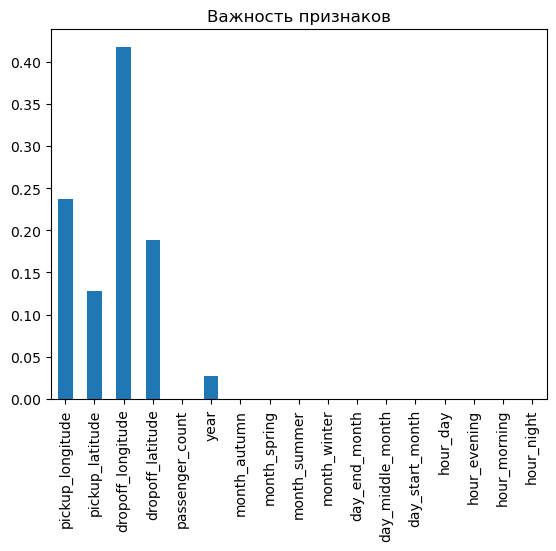

In [134]:
pd.Series(grid_new.best_estimator_.feature_importances_,index = X_train_new.columns).plot(kind="bar", title="Важность признаков")

### Quiz

Какой из признаков, связанных с датой поездки, самый важный для модели?

## Кластеризация и визуализация

Оставьте только те строчки в таблице df (после удаления пропусков), для которых выполнены оба условия:

* `dropoff_latitude` $\in (39;41)$
* `dropoff_longitude` $\in (-75;-72)$

### Quiz

Сколько строк осталось в таблице?

In [4]:
df2 = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")
df2.dropna(inplace = True)

In [5]:
df3 = df2[(df2.dropoff_latitude>=39)&(df2.dropoff_latitude<=41)&(df2.dropoff_longitude>=-75)&(df2.dropoff_longitude<=-72)]
df3.shape

(603729, 8)

Разбейте все поездки по признакам `dropoff_latitude`, `dropoff_longitude` на 5 кластеров.

Используйте kmeans c `random_state=42`.

Визуализируйте поездки из таблицы df в осях `dropoff_latitude`, `dropoff_longitude` - покрасьте точки в цвета, соответствующие кластерам.

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42).fit(df3[['dropoff_latitude', 'dropoff_longitude']])

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
df3['cluster'] = kmeans.labels_

C:\Users\Covid2019\AppData\Local\Temp\ipykernel_7052\3787078501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = kmeans.labels_


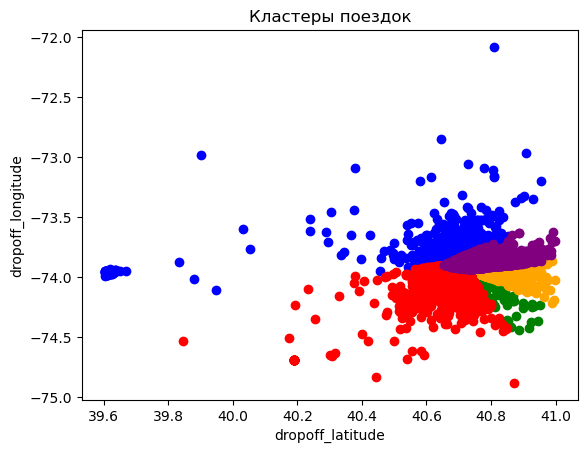

In [8]:
colo = {0:'green',1:'blue',2:'orange',3:'red',4:'purple'}
plt.xlabel('dropoff_latitude')
plt.ylabel('dropoff_longitude')
for number,color in colo.items():
    plt.scatter(x = df3[df3.cluster==number].dropoff_latitude, y = df3.dropoff_longitude[df3.cluster==number], c = color, label = color)
plt.title("Кластеры поездок")
plt.show()

### Quiz

Для каждого кластера вычислите среднюю стоимость поездки.

Чему равна самая большая средняя стоимость поездки по кластерам? Ответ округлите до целого числа.

In [9]:
df3.groupby('cluster').fare_amount.mean().round().sort_values(ascending=False)

cluster
1    40.0
4    24.0
3    13.0
0    10.0
2    10.0
Name: fare_amount, dtype: float64

Отдельно нарисуйте кластер с наибольшей средней стоимостью поездки. В нем выделяется два островка.

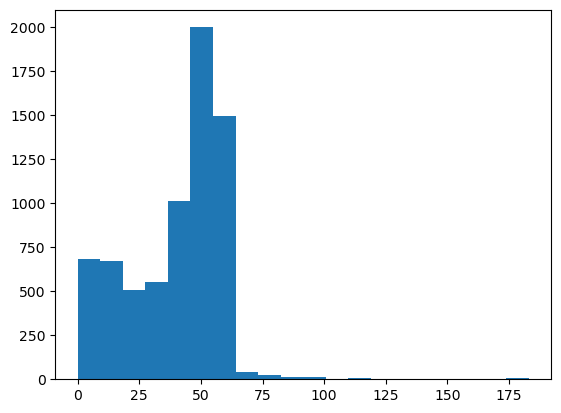

In [10]:
plt.hist(df3[df3.cluster==1].fare_amount, bins=20)
plt.show()

### Quiz

Кластеризуйте точки этого кластера при помощи DBSCAN с гиперпараметрами `eps`=0.15, `min_samples`=10.

Нарисуйте результат.

Вычислите координаты центра (среднее арифметрическое) меньшего кластера.

В ответе укажите `dropoff_latitude`, округленную до тысячных.

In [11]:
from sklearn.cluster import DBSCAN

In [29]:
db_scan = DBSCAN(eps=0.15,min_samples=10).fit(df3[df3.cluster==1][['dropoff_latitude', 'dropoff_longitude']])

In [30]:
df4 = df3[df3.cluster==1][['dropoff_latitude', 'dropoff_longitude']]

In [31]:
df4['cluster']= db_scan.labels_

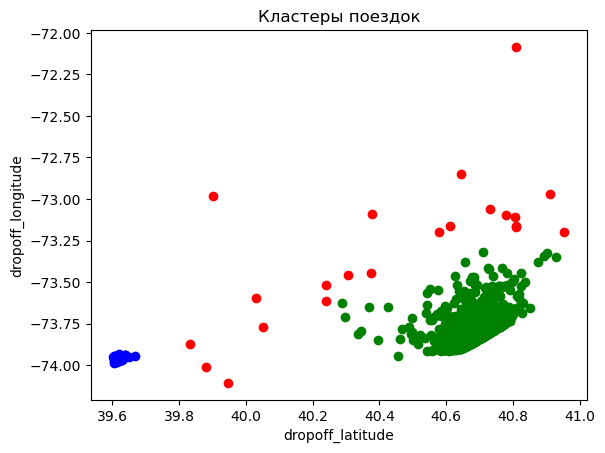

In [36]:
colo = {0:'green',1:'blue',-1:'red'}
plt.xlabel('dropoff_latitude')
plt.ylabel('dropoff_longitude')
for number,color in colo.items():
    plt.scatter(x = df4[df4.cluster==number].dropoff_latitude, y = df4.dropoff_longitude[df4.cluster==number], c = color, label = color)
plt.title("Кластеры поездок")
plt.show()

In [39]:
round(df4[df4.cluster==1].dropoff_latitude.mean(),3) # Вычислите координаты центра (среднее арифметрическое) меньшего кластера

39.616

# Часть 2

## Творческая (но обязательная) часть

В работе мы построили baseline-модель, потом попытались ее улучшить, усложнив пайплайн увеличением, а затем снижением размерности. Но попробовали мы лишь малую часть из всех возможных подходов, а также всего лишь одну модель - решающее дерево.

В этой части задания вам предлагается не ограничивать себя идеями, попробованными выше:
* придумывайте новые признаки
* пробуйте разные кодировки признаков
* снижайте размерность и делайте отбор признаков
* пробуйте разные модели
* комбинируйте подходы

У вас есть знания целого курса для работы над задачей, ни в чем вас не ограничиваем!

Ваша цель - построить модель, дающую наилучший скор $R^2$ на тестовых данных (с фиксированным разбиением на train-test, указанным в коде ноутбука выше).

In [3]:
data = pd.read_csv("https://www.dropbox.com/s/glmbcyopi24m2ni/final_project_data.csv?dl=1")

In [4]:
data = data.dropna()
data.drop('key', axis=1, inplace = True)
data.pickup_datetime = pd.to_datetime(data.pickup_datetime)
data['year'] = data.pickup_datetime.dt.year
data['month'] = data.pickup_datetime.dt.month
data['day'] = data.pickup_datetime.dt.day
data['hour'] = data.pickup_datetime.apply(lambda x: x.hour if x.minute<=30 else x.hour+1)
data.drop('pickup_datetime', axis=1, inplace = True)

In [5]:
def cezon (x):
    if x==12 or x==1 or x ==2:
        return 'winter'
    if x==3 or x==4 or x ==5:
        return 'spring'
    if x==6 or x==7 or x ==8:
        return 'summer'
    if x==9 or x==10 or x ==11:
        return 'autumn'

In [6]:
def _month (x):
    if x<=10:
        return 'start_month'
    if 11<=x<=20:
        return 'middle_month'
    if x>=21:
        return 'end_month'

In [7]:
def hour_time (x):
    if x <= 5 or x >= 23:
        return 'night'
    if x <= 11:
        return 'morning'
    if x <= 16:
        return 'day'
    else:
        return 'evening'

In [8]:
data["month"] = data.month.apply(cezon)
data["day"] = data.day.apply(_month)
data["hour"] = data.hour.apply(hour_time)

In [9]:
X = data.drop('fare_amount', axis =1)
y = data['fare_amount']

In [10]:
import featuretools as ft

In [11]:
es = ft.EntitySet(id = 'index')
es = es.add_dataframe(
      dataframe_name="X",
      dataframe=data[[ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'year', 'month', 'day', 'hour']],
      index="index",
)

C:\Anaconda\Lib\site-packages\featuretools\entityset\entityset.py:1910: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(


In [12]:
feature_matrix, feature_defs = ft.dfs(entityset = es, target_dataframe_name = 'X',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

C:\Anaconda\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [13]:
feature_matrix = feature_matrix.reset_index().drop('index',axis=1)

In [17]:
y= y.reset_index().drop('index', axis=1)

In [14]:
categorical_columns = feature_matrix.select_dtypes('category').columns

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder 
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

In [17]:
p1 = Pipeline([
    ('encoder_',TargetEncoder(cols=categorical_columns)), 
    ('features', PolynomialFeatures()),
    ('scaler_', StandardScaler()),
    ('model_', LinearRegression())
])

p2 = Pipeline([
    ('encoder_',TargetEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', StandardScaler()),
    ('model_', GradientBoostingRegressor(verbose=0,random_state=42))
])

p3 = Pipeline([
    ('encoder_',TargetEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', StandardScaler()),
    ('model_', CatBoostRegressor(random_state=42)) 
])


p4 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', MinMaxScaler()),
    ('model_', CatBoostRegressor(verbose=0))
    ])

p5 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', MinMaxScaler()),
    ('model_', GradientBoostingRegressor(verbose=0,random_state=42))
])

p6 = Pipeline([
    ('encoder_',LeaveOneOutEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', StandardScaler()),
    ('model_', RandomForestRegressor(random_state=42))
    ])

p7 = Pipeline([
    ('encoder_',TargetEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', MinMaxScaler()),
    ('model_', RandomForestRegressor(random_state=42))
    ])

p8 = Pipeline([
    ('encoder_', TargetEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', MinMaxScaler()),
    ('model_', XGBRegressor(random_state=42))
])

p9 = Pipeline([
    ('encoder_', TargetEncoder(cols=categorical_columns)),
    ('features', PolynomialFeatures()),
    ('scaler_', StandardScaler()),
    ('model_', XGBRegressor())
])

In [18]:
%%time
for i, p in enumerate([p1, p2, p3, p4, p5, p6, p7, p8, p9]):
    print(i,'Mодель:',str(p[3]), 'r2_score',np.mean(cross_val_score(p,feature_matrix.iloc[:10000,:],y.iloc[:10000],cv=3, scoring='r2')))

0 Mодель: LinearRegression() r2_score -1.4056004164139285e+20
1 Mодель: GradientBoostingRegressor(random_state=42) r2_score 0.7073743878073557
Learning rate set to 0.055252
0:	learn: 9.2150967	total: 632ms	remaining: 10m 31s
1:	learn: 8.9546846	total: 822ms	remaining: 6m 50s
2:	learn: 8.7170135	total: 1.03s	remaining: 5m 42s
3:	learn: 8.4746787	total: 1.24s	remaining: 5m 7s
4:	learn: 8.2571054	total: 1.43s	remaining: 4m 44s
5:	learn: 8.0500761	total: 1.63s	remaining: 4m 30s
6:	learn: 7.8541209	total: 1.82s	remaining: 4m 19s
7:	learn: 7.6763734	total: 2.03s	remaining: 4m 11s
8:	learn: 7.5130859	total: 2.21s	remaining: 4m 3s
9:	learn: 7.3614704	total: 2.42s	remaining: 3m 59s
10:	learn: 7.2016980	total: 2.61s	remaining: 3m 54s
11:	learn: 7.0750257	total: 2.82s	remaining: 3m 51s
12:	learn: 6.9439994	total: 3s	remaining: 3m 48s
13:	learn: 6.8092620	total: 3.2s	remaining: 3m 45s
14:	learn: 6.6660485	total: 3.4s	remaining: 3m 42s
15:	learn: 6.5189806	total: 3.6s	remaining: 3m 41s
16:	learn: 6

## Модели
- 0 Mодель: LinearRegression() r2_score -1.4056004164139285e+20
- 1 Mодель: GradientBoostingRegressor() r2_score 0.7073743878073557
- 2 Mодель: CatBoostRegressor() r2_score 0.7342072737161036
- 3 Mодель: CatBoostRegressor() r2_score 0.4957123473904374
- 4 Mодель: GradientBoostingRegressor() r2_score 0.5178696040873408
- 5 Mодель: RandomForestRegressor() r2_score 0.5501358939930431
- 6 Mодель: RandomForestRegressor() r2_score 0.707357810824894
- 7 Mодель: XGBRegressor() r2_score 0.6552794580677662
- 8 Mодель: XGBRegressor() r2_score 0.6506389300155462

In [32]:
cat_features_ = []
for i in list(feature_matrix.select_dtypes('category').columns):
    cat_features_.append(feature_matrix.columns.get_loc(i))

In [33]:
model_feature= CatBoostRegressor(cat_features=cat_features_,random_state=42).fit(feature_matrix, y)

Learning rate set to 0.112961
0:	learn: 9.1358422	total: 1.94s	remaining: 32m 15s
1:	learn: 8.6284391	total: 2.5s	remaining: 20m 46s
2:	learn: 8.2017509	total: 3.13s	remaining: 17m 21s
3:	learn: 7.8147080	total: 3.71s	remaining: 15m 23s
4:	learn: 7.4931555	total: 4.21s	remaining: 13m 58s
5:	learn: 7.2357884	total: 4.77s	remaining: 13m 9s
6:	learn: 6.9991262	total: 5.34s	remaining: 12m 37s
7:	learn: 6.8031175	total: 6.02s	remaining: 12m 26s
8:	learn: 6.6268544	total: 6.75s	remaining: 12m 23s
9:	learn: 6.4594267	total: 7.36s	remaining: 12m 8s
10:	learn: 6.3380060	total: 7.94s	remaining: 11m 54s
11:	learn: 6.1994005	total: 8.56s	remaining: 11m 44s
12:	learn: 6.0777188	total: 9.15s	remaining: 11m 35s
13:	learn: 5.9926682	total: 9.72s	remaining: 11m 24s
14:	learn: 5.8980821	total: 10.3s	remaining: 11m 17s
15:	learn: 5.7970744	total: 11s	remaining: 11m 14s
16:	learn: 5.7096310	total: 11.7s	remaining: 11m 13s
17:	learn: 5.6555491	total: 12.4s	remaining: 11m 15s
18:	learn: 5.5804873	total: 13.

In [35]:
pd.Series(model_feature.feature_importances_, index = feature_matrix.columns).sort_values(ascending = False) ## Важность признаков

dropoff_latitude * pickup_longitude     16.494803
dropoff_longitude * pickup_latitude     12.573877
dropoff_longitude                       10.707610
dropoff_longitude * pickup_longitude     7.546887
dropoff_longitude + pickup_longitude     7.360266
dropoff_longitude + pickup_latitude      6.022588
dropoff_latitude * dropoff_longitude     5.213557
dropoff_latitude + pickup_longitude      4.943414
pickup_latitude * pickup_longitude       4.672065
pickup_longitude                         4.568551
dropoff_latitude + dropoff_longitude     4.498284
dropoff_latitude                         3.102700
pickup_latitude                          1.904507
dropoff_latitude + year                  1.793744
pickup_latitude + pickup_longitude       1.126064
dropoff_latitude + pickup_latitude       1.092734
pickup_latitude + year                   1.028202
year                                     0.818646
hour                                     0.637992
dropoff_longitude + year                 0.624802


Используем только признаки с важностью более 1 

In [38]:
X_train, X_test, y_train, y_test = train_test_split (feature_matrix [['dropoff_latitude * pickup_longitude','dropoff_longitude * pickup_latitude','dropoff_longitude','dropoff_longitude * pickup_longitude', 'dropoff_longitude + pickup_longitude','dropoff_longitude + pickup_latitude','dropoff_latitude * dropoff_longitude','dropoff_latitude + pickup_longitude','pickup_latitude * pickup_longitude','pickup_longitude','dropoff_latitude + dropoff_longitude','dropoff_latitude','pickup_latitude','dropoff_latitude + year','pickup_latitude + pickup_longitude','dropoff_latitude + pickup_latitude','pickup_latitude + year']],y, test_size=0.25, random_state = 42)

In [39]:
data_pipe = Pipeline([
   ('features', PolynomialFeatures()),
   ('scaler_', StandardScaler())
])


X_train_pr = data_pipe.fit_transform(X_train, y_train)
X_test_pr = data_pipe.transform(X_test)

In [40]:
import optuna

In [41]:
def objective_cat (trial):
    model_cb = CatBoostRegressor(iterations = trial.suggest_int("iterations", 580, 630),depth = trial.suggest_int("depth", 4, 12), 
                              
                                 learning_rate = trial.suggest_float("learning_rate", 0.02, 0.07), random_state=42).fit(X_train_pr, y_train)
    y_pred=model_cb.predict(X_test_pr)
    return r2_score(y_test,y_pred)

In [42]:
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_cat, n_trials=11)

[I 2024-05-02 13:47:48,647] A new study created in memory with name: no-name-4c33891c-d903-49a6-9235-2c3872e2fb1a


0:	learn: 9.3281158	total: 725ms	remaining: 6m 59s
1:	learn: 8.9618826	total: 1.05s	remaining: 5m 4s
2:	learn: 8.6155106	total: 1.51s	remaining: 4m 49s
3:	learn: 8.3132690	total: 1.83s	remaining: 4m 23s
4:	learn: 8.0262667	total: 2.19s	remaining: 4m 11s
5:	learn: 7.7690191	total: 2.54s	remaining: 4m 2s
6:	learn: 7.5192099	total: 2.92s	remaining: 3m 58s
7:	learn: 7.3027955	total: 3.31s	remaining: 3m 56s
8:	learn: 7.0952419	total: 3.73s	remaining: 3m 56s
9:	learn: 6.9039210	total: 4.16s	remaining: 3m 57s
10:	learn: 6.7313493	total: 4.59s	remaining: 3m 57s
11:	learn: 6.5857110	total: 4.98s	remaining: 3m 55s
12:	learn: 6.4377700	total: 5.32s	remaining: 3m 52s
13:	learn: 6.3063739	total: 5.67s	remaining: 3m 49s
14:	learn: 6.1924227	total: 6.05s	remaining: 3m 47s
15:	learn: 6.0837059	total: 6.38s	remaining: 3m 44s
16:	learn: 5.9760416	total: 6.8s	remaining: 3m 45s
17:	learn: 5.8893439	total: 7.18s	remaining: 3m 44s
18:	learn: 5.8036626	total: 7.53s	remaining: 3m 42s
19:	learn: 5.7313779	tota

[I 2024-05-02 13:53:14,668] Trial 0 finished with value: 0.7915364057662817 and parameters: {'iterations': 580, 'depth': 7, 'learning_rate': 0.06835663398760593}. Best is trial 0 with value: 0.7915364057662817.


0:	learn: 9.5747941	total: 586ms	remaining: 5m 54s
1:	learn: 9.4264705	total: 1.19s	remaining: 6m
2:	learn: 9.2826442	total: 1.63s	remaining: 5m 27s
3:	learn: 9.1433225	total: 2.09s	remaining: 5m 14s
4:	learn: 9.0091243	total: 2.5s	remaining: 5m
5:	learn: 8.8786555	total: 2.97s	remaining: 4m 56s
6:	learn: 8.7497652	total: 3.4s	remaining: 4m 51s
7:	learn: 8.6275979	total: 3.86s	remaining: 4m 48s
8:	learn: 8.5092677	total: 4.28s	remaining: 4m 43s
9:	learn: 8.3917463	total: 4.77s	remaining: 4m 44s
10:	learn: 8.2769675	total: 5.29s	remaining: 4m 46s
11:	learn: 8.1694447	total: 5.73s	remaining: 4m 43s
12:	learn: 8.0632221	total: 6.18s	remaining: 4m 41s
13:	learn: 7.9595318	total: 6.7s	remaining: 4m 43s
14:	learn: 7.8597205	total: 7.19s	remaining: 4m 43s
15:	learn: 7.7673501	total: 7.66s	remaining: 4m 42s
16:	learn: 7.6753979	total: 8.06s	remaining: 4m 39s
17:	learn: 7.5829599	total: 8.55s	remaining: 4m 39s
18:	learn: 7.4949582	total: 9.09s	remaining: 4m 40s
19:	learn: 7.4106093	total: 9.52s

[I 2024-05-02 13:59:51,251] Trial 1 finished with value: 0.7901059450414425 and parameters: {'iterations': 606, 'depth': 8, 'learning_rate': 0.025169302861071004}. Best is trial 0 with value: 0.7915364057662817.


0:	learn: 9.5571231	total: 441ms	remaining: 4m 32s
1:	learn: 9.3922071	total: 856ms	remaining: 4m 24s
2:	learn: 9.2342424	total: 1.27s	remaining: 4m 21s
3:	learn: 9.0825557	total: 1.68s	remaining: 4m 18s
4:	learn: 8.9406412	total: 2.13s	remaining: 4m 21s
5:	learn: 8.7951618	total: 2.56s	remaining: 4m 21s
6:	learn: 8.6597250	total: 2.96s	remaining: 4m 18s
7:	learn: 8.5269815	total: 3.42s	remaining: 4m 20s
8:	learn: 8.3970679	total: 3.77s	remaining: 4m 15s
9:	learn: 8.2737582	total: 4.18s	remaining: 4m 14s
10:	learn: 8.1509158	total: 4.62s	remaining: 4m 15s
11:	learn: 8.0326611	total: 5.05s	remaining: 4m 15s
12:	learn: 7.9248742	total: 5.36s	remaining: 4m 9s
13:	learn: 7.8197262	total: 5.69s	remaining: 4m 5s
14:	learn: 7.7208353	total: 6.07s	remaining: 4m 4s
15:	learn: 7.6263576	total: 6.45s	remaining: 4m 2s
16:	learn: 7.5312571	total: 6.78s	remaining: 4m
17:	learn: 7.4368649	total: 7.21s	remaining: 4m
18:	learn: 7.3493384	total: 7.53s	remaining: 3m 57s
19:	learn: 7.2632887	total: 7.9s	r

[I 2024-05-02 14:05:31,653] Trial 2 finished with value: 0.7891477411169233 and parameters: {'iterations': 619, 'depth': 7, 'learning_rate': 0.028926242205060224}. Best is trial 0 with value: 0.7915364057662817.


0:	learn: 9.5791406	total: 6.14s	remaining: 1h 3m 19s
1:	learn: 9.4356085	total: 12.5s	remaining: 1h 4m 14s
2:	learn: 9.2949595	total: 19.4s	remaining: 1h 6m 21s
3:	learn: 9.1569088	total: 25.4s	remaining: 1h 5m 13s
4:	learn: 9.0239019	total: 32.2s	remaining: 1h 6m 2s
5:	learn: 8.8947214	total: 38.5s	remaining: 1h 5m 42s
6:	learn: 8.7707331	total: 45s	remaining: 1h 5m 37s
7:	learn: 8.6482300	total: 51.7s	remaining: 1h 5m 53s
8:	learn: 8.5278066	total: 57.9s	remaining: 1h 5m 30s
9:	learn: 8.4117397	total: 1m 4s	remaining: 1h 5m 56s
10:	learn: 8.2995302	total: 1m 11s	remaining: 1h 5m 41s
11:	learn: 8.1904563	total: 1m 17s	remaining: 1h 5m 31s
12:	learn: 8.0839439	total: 1m 24s	remaining: 1h 5m 38s
13:	learn: 7.9806524	total: 1m 30s	remaining: 1h 5m 14s
14:	learn: 7.8805123	total: 1m 37s	remaining: 1h 5m 28s
15:	learn: 7.7840168	total: 1m 43s	remaining: 1h 5m 6s
16:	learn: 7.6864234	total: 1m 50s	remaining: 1h 5m 7s
17:	learn: 7.5912809	total: 1m 56s	remaining: 1h 5m 6s
18:	learn: 7.50074

[I 2024-05-02 15:14:20,554] Trial 3 finished with value: 0.792268543182294 and parameters: {'iterations': 620, 'depth': 12, 'learning_rate': 0.02262496086074319}. Best is trial 3 with value: 0.792268543182294.


0:	learn: 9.4634918	total: 485ms	remaining: 4m 43s
1:	learn: 9.2129546	total: 1.01s	remaining: 4m 56s
2:	learn: 8.9761769	total: 1.48s	remaining: 4m 47s
3:	learn: 8.7524287	total: 2.04s	remaining: 4m 56s
4:	learn: 8.5424723	total: 2.46s	remaining: 4m 46s
5:	learn: 8.3345098	total: 2.97s	remaining: 4m 47s
6:	learn: 8.1371215	total: 3.49s	remaining: 4m 49s
7:	learn: 7.9554088	total: 3.96s	remaining: 4m 46s
8:	learn: 7.7844355	total: 4.42s	remaining: 4m 43s
9:	learn: 7.6215330	total: 4.92s	remaining: 4m 44s
10:	learn: 7.4682071	total: 5.41s	remaining: 4m 43s
11:	learn: 7.3261979	total: 5.88s	remaining: 4m 41s
12:	learn: 7.1876901	total: 6.32s	remaining: 4m 39s
13:	learn: 7.0519411	total: 6.8s	remaining: 4m 38s
14:	learn: 6.9260421	total: 7.27s	remaining: 4m 37s
15:	learn: 6.8140429	total: 7.74s	remaining: 4m 36s
16:	learn: 6.6999694	total: 8.32s	remaining: 4m 39s
17:	learn: 6.5959004	total: 8.79s	remaining: 4m 37s
18:	learn: 6.4907673	total: 9.29s	remaining: 4m 37s
19:	learn: 6.4027064	to

[I 2024-05-02 15:20:42,268] Trial 4 finished with value: 0.7922787340462449 and parameters: {'iterations': 587, 'depth': 8, 'learning_rate': 0.043665713483839214}. Best is trial 4 with value: 0.7922787340462449.


0:	learn: 9.4484869	total: 3.09s	remaining: 31m 47s
1:	learn: 9.1823204	total: 6s	remaining: 30m 51s
2:	learn: 8.9340066	total: 8.52s	remaining: 29m 8s
3:	learn: 8.6985072	total: 11s	remaining: 28m 15s
4:	learn: 8.4747130	total: 13.5s	remaining: 27m 43s
5:	learn: 8.2620926	total: 16.3s	remaining: 27m 48s
6:	learn: 8.0608860	total: 19.5s	remaining: 28m 26s
7:	learn: 7.8673237	total: 22.4s	remaining: 28m 34s
8:	learn: 7.6905194	total: 25.1s	remaining: 28m 19s
9:	learn: 7.5163920	total: 27.7s	remaining: 28m 8s
10:	learn: 7.3512985	total: 30.4s	remaining: 27m 58s
11:	learn: 7.1960436	total: 33.4s	remaining: 28m 8s
12:	learn: 7.0532676	total: 36.4s	remaining: 28m 18s
13:	learn: 6.9190448	total: 39.2s	remaining: 28m 12s
14:	learn: 6.7894631	total: 41.8s	remaining: 28m 2s
15:	learn: 6.6683239	total: 44.4s	remaining: 27m 52s
16:	learn: 6.5489246	total: 47s	remaining: 27m 43s
17:	learn: 6.4377120	total: 50s	remaining: 27m 50s
18:	learn: 6.3358534	total: 53s	remaining: 27m 54s
19:	learn: 6.23964

[I 2024-05-02 15:55:19,836] Trial 5 finished with value: 0.7945471973644062 and parameters: {'iterations': 619, 'depth': 10, 'learning_rate': 0.04408767947521375}. Best is trial 5 with value: 0.7945471973644062.


0:	learn: 9.5891408	total: 918ms	remaining: 8m 54s
1:	learn: 9.4549767	total: 2.54s	remaining: 12m 17s
2:	learn: 9.3247561	total: 2.97s	remaining: 9m 34s
3:	learn: 9.1990989	total: 3.48s	remaining: 8m 23s
4:	learn: 9.0801594	total: 3.92s	remaining: 7m 33s
5:	learn: 8.9576513	total: 4.42s	remaining: 7m 5s
6:	learn: 8.8425483	total: 4.77s	remaining: 6m 32s
7:	learn: 8.7305447	total: 5.18s	remaining: 6m 12s
8:	learn: 8.6204273	total: 5.61s	remaining: 5m 57s
9:	learn: 8.5152851	total: 5.99s	remaining: 5m 43s
10:	learn: 8.4104685	total: 6.35s	remaining: 5m 30s
11:	learn: 8.3065742	total: 6.77s	remaining: 5m 22s
12:	learn: 8.2063012	total: 7.2s	remaining: 5m 15s
13:	learn: 8.1103276	total: 7.55s	remaining: 5m 6s
14:	learn: 8.0183374	total: 7.91s	remaining: 4m 59s
15:	learn: 7.9267692	total: 8.29s	remaining: 4m 53s
16:	learn: 7.8400522	total: 8.68s	remaining: 4m 49s
17:	learn: 7.7553776	total: 9.22s	remaining: 4m 49s
18:	learn: 7.6737463	total: 9.7s	remaining: 4m 48s
19:	learn: 7.5936911	tota

[I 2024-05-02 16:03:59,082] Trial 6 finished with value: 0.786927986436328 and parameters: {'iterations': 583, 'depth': 7, 'learning_rate': 0.02346562439268462}. Best is trial 5 with value: 0.7945471973644062.


0:	learn: 9.4923746	total: 1.32s	remaining: 13m 29s
1:	learn: 9.2688490	total: 2.24s	remaining: 11m 26s
2:	learn: 9.0556043	total: 3.08s	remaining: 10m 27s
3:	learn: 8.8541896	total: 3.95s	remaining: 10m 2s
4:	learn: 8.6587067	total: 4.62s	remaining: 9m 23s
5:	learn: 8.4672694	total: 5.96s	remaining: 10m 5s
6:	learn: 8.2923025	total: 6.88s	remaining: 9m 57s
7:	learn: 8.1210051	total: 7.73s	remaining: 9m 46s
8:	learn: 7.9567853	total: 8.56s	remaining: 9m 36s
9:	learn: 7.8024942	total: 9.37s	remaining: 9m 27s
10:	learn: 7.6531423	total: 10.2s	remaining: 9m 22s
11:	learn: 7.5097906	total: 11.1s	remaining: 9m 17s
12:	learn: 7.3732538	total: 11.8s	remaining: 9m 5s
13:	learn: 7.2447192	total: 12.4s	remaining: 8m 53s
14:	learn: 7.1208463	total: 13.1s	remaining: 8m 44s
15:	learn: 7.0035696	total: 13.8s	remaining: 8m 36s
16:	learn: 6.8902474	total: 14.4s	remaining: 8m 27s
17:	learn: 6.7860626	total: 15.8s	remaining: 8m 42s
18:	learn: 6.6865331	total: 16.4s	remaining: 8m 35s
19:	learn: 6.5900953

[I 2024-05-02 16:15:15,630] Trial 7 finished with value: 0.7926575784978571 and parameters: {'iterations': 615, 'depth': 9, 'learning_rate': 0.03785001859117403}. Best is trial 5 with value: 0.7945471973644062.


0:	learn: 9.5203970	total: 6.71s	remaining: 1h 9m 18s
1:	learn: 9.3241372	total: 12.7s	remaining: 1h 5m 23s
2:	learn: 9.1323072	total: 17s	remaining: 58m 24s
3:	learn: 8.9471749	total: 23s	remaining: 59m 7s
4:	learn: 8.7695028	total: 30.2s	remaining: 1h 1m 56s
5:	learn: 8.6006113	total: 36.7s	remaining: 1h 2m 39s
6:	learn: 8.4388369	total: 42.2s	remaining: 1h 1m 39s
7:	learn: 8.2819165	total: 46.5s	remaining: 59m 25s
8:	learn: 8.1333271	total: 51.3s	remaining: 58m 11s
9:	learn: 7.9880901	total: 57.2s	remaining: 58m 14s
10:	learn: 7.8459052	total: 1m 1s	remaining: 56m 59s
11:	learn: 7.7128088	total: 1m 5s	remaining: 55m 45s
12:	learn: 7.5846440	total: 1m 10s	remaining: 55m 11s
13:	learn: 7.4580420	total: 1m 15s	remaining: 54m 14s
14:	learn: 7.3374961	total: 1m 19s	remaining: 53m 22s
15:	learn: 7.2241984	total: 1m 23s	remaining: 52m 48s
16:	learn: 7.1167711	total: 1m 28s	remaining: 52m 25s
17:	learn: 7.0100012	total: 1m 32s	remaining: 51m 42s
18:	learn: 6.9075726	total: 1m 36s	remaining:

[I 2024-05-02 17:08:12,382] Trial 8 finished with value: 0.7937940186154635 and parameters: {'iterations': 621, 'depth': 11, 'learning_rate': 0.03197570983077524}. Best is trial 5 with value: 0.7945471973644062.


0:	learn: 9.4386448	total: 485ms	remaining: 5m 2s
1:	learn: 9.1666181	total: 848ms	remaining: 4m 24s
2:	learn: 8.9071239	total: 1.27s	remaining: 4m 22s
3:	learn: 8.6703430	total: 1.69s	remaining: 4m 21s
4:	learn: 8.4407320	total: 2.08s	remaining: 4m 18s
5:	learn: 8.2290754	total: 2.44s	remaining: 4m 11s
6:	learn: 8.0277918	total: 2.98s	remaining: 4m 22s
7:	learn: 7.8403242	total: 3.43s	remaining: 4m 24s
8:	learn: 7.6656735	total: 3.77s	remaining: 4m 17s
9:	learn: 7.4961078	total: 4.16s	remaining: 4m 15s
10:	learn: 7.3351269	total: 4.6s	remaining: 4m 16s
11:	learn: 7.1943661	total: 4.97s	remaining: 4m 13s
12:	learn: 7.0552216	total: 5.37s	remaining: 4m 12s
13:	learn: 6.9259031	total: 5.73s	remaining: 4m 10s
14:	learn: 6.8133486	total: 6.11s	remaining: 4m 8s
15:	learn: 6.6980531	total: 6.52s	remaining: 4m 8s
16:	learn: 6.5906368	total: 6.94s	remaining: 4m 8s
17:	learn: 6.4820180	total: 7.38s	remaining: 4m 8s
18:	learn: 6.3796931	total: 7.8s	remaining: 4m 8s
19:	learn: 6.2930499	total: 8.

[I 2024-05-02 17:14:57,462] Trial 9 finished with value: 0.79206155684385 and parameters: {'iterations': 625, 'depth': 7, 'learning_rate': 0.04924182249094948}. Best is trial 5 with value: 0.7945471973644062.


0:	learn: 9.4322789	total: 270ms	remaining: 2m 40s
1:	learn: 9.1593268	total: 507ms	remaining: 2m 30s
2:	learn: 8.8907500	total: 751ms	remaining: 2m 28s
3:	learn: 8.6566026	total: 1.02s	remaining: 2m 30s
4:	learn: 8.4267865	total: 1.26s	remaining: 2m 28s
5:	learn: 8.2141691	total: 1.49s	remaining: 2m 26s
6:	learn: 8.0263458	total: 1.75s	remaining: 2m 27s
7:	learn: 7.8483061	total: 2.03s	remaining: 2m 29s
8:	learn: 7.6854085	total: 2.32s	remaining: 2m 31s
9:	learn: 7.5390187	total: 2.59s	remaining: 2m 31s
10:	learn: 7.3822787	total: 2.81s	remaining: 2m 29s
11:	learn: 7.2479781	total: 3.06s	remaining: 2m 29s
12:	learn: 7.1197310	total: 3.38s	remaining: 2m 31s
13:	learn: 6.9936413	total: 3.73s	remaining: 2m 35s
14:	learn: 6.8723427	total: 4.04s	remaining: 2m 36s
15:	learn: 6.7679058	total: 4.35s	remaining: 2m 37s
16:	learn: 6.6674227	total: 4.7s	remaining: 2m 40s
17:	learn: 6.5791351	total: 5.08s	remaining: 2m 43s
18:	learn: 6.4782792	total: 5.36s	remaining: 2m 42s
19:	learn: 6.3977160	to

[I 2024-05-02 17:19:14,356] Trial 10 finished with value: 0.7886473661381708 and parameters: {'iterations': 597, 'depth': 5, 'learning_rate': 0.05625434678386985}. Best is trial 5 with value: 0.7945471973644062.


In [43]:
study_cat.best_value

0.7945471973644062

In [44]:
study_cat.best_params

{'iterations': 619, 'depth': 10, 'learning_rate': 0.04408767947521375}

In [45]:
model_CatBoost = CatBoostRegressor(**study_cat.best_params, random_state=42).fit(X_train_pr, y_train)

0:	learn: 9.4484869	total: 2.57s	remaining: 26m 27s
1:	learn: 9.1823204	total: 5.11s	remaining: 26m 16s
2:	learn: 8.9340066	total: 7.84s	remaining: 26m 50s
3:	learn: 8.6985072	total: 11.1s	remaining: 28m 19s
4:	learn: 8.4747130	total: 13.9s	remaining: 28m 24s
5:	learn: 8.2620926	total: 16.5s	remaining: 28m 6s
6:	learn: 8.0608860	total: 19.1s	remaining: 27m 46s
7:	learn: 7.8673237	total: 21.7s	remaining: 27m 34s
8:	learn: 7.6905194	total: 24.5s	remaining: 27m 43s
9:	learn: 7.5163920	total: 27.8s	remaining: 28m 11s
10:	learn: 7.3512985	total: 30.6s	remaining: 28m 12s
11:	learn: 7.1960436	total: 33.3s	remaining: 28m 4s
12:	learn: 7.0532676	total: 35.8s	remaining: 27m 50s
13:	learn: 6.9190448	total: 38.4s	remaining: 27m 39s
14:	learn: 6.7894631	total: 41.5s	remaining: 27m 52s
15:	learn: 6.6683239	total: 44.5s	remaining: 27m 58s
16:	learn: 6.5489246	total: 47.3s	remaining: 27m 53s
17:	learn: 6.4377120	total: 49.9s	remaining: 27m 44s
18:	learn: 6.3358534	total: 52.4s	remaining: 27m 35s
19:	l

In [46]:
r2_score(y_test,model_CatBoost.predict(X_test_pr))

0.7945471973644062

### Итоговый отчет

Результаты исследований, проведенных в творческой части задания, оформите в виде отчета. Отчет - это текстовый документ (желательно, google docs - чтобы мы могли при ревью оставлять в нем комментарии), не ноутбук!

В отчете по пунктам должны быть отражены ваши действия при решении задачи:

1) Какие подходы попробовали - перечислить, описать

2) Какие подходы сработали, какие нет

3) Какой пайплайн дал наилучший результат? Какого качества удалось добиться?

4) Интерпретация важности признаков для наилучшего пайплайна. Какие признаки оказались наиболее важны для модели, какие нет? Как вы думаете почему?

Отчет пишется в свободной форме. В отчет можно включать визуализации, если считаете нужным.

Удачи!